In [1]:
# Welcome to Machine Learning for Everyone
# This is the first chapter of the free learning path of Machine Learning by Corrales Data Analytics Lab
# In this chapter, we will focus on Decision Trees, one of the most intuitive and widely used models for classification and regression tasks.

# Importing necessary libraries
import pandas as pd

# Load the dataset into a pandas DataFrame
# The file 'loan.csv' should be in the current working directory
loan_df = pd.read_csv('loan.csv')

# Display the first few rows of the dataset to ensure it was loaded correctly
# This helps to quickly understand the structure of the data and verify the import
loan_df.head()



,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [3]:
# Basic information about the dataset
# This will provide an overview of the columns, data types, and non-null values
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [4]:
# Statistical summary of the dataset
# Shows key statistics such as mean, median, and percentiles for numerical columns
loan_df.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [2]:
import matplotlib.pyplot as plt  # Library for plotting
import seaborn as sns  # Library for advanced data visualization

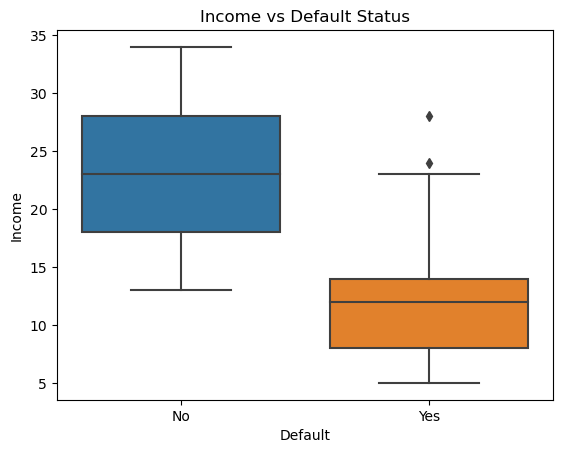

In [6]:
# Plotting the distribution of income based on default status
# Using seaborn to create a boxplot to visualize the relationship between 'Default' and 'Income'
ax = sns.boxplot(data=loan_df, x='Default', y='Income')
plt.title('Income vs Default Status')
plt.show()

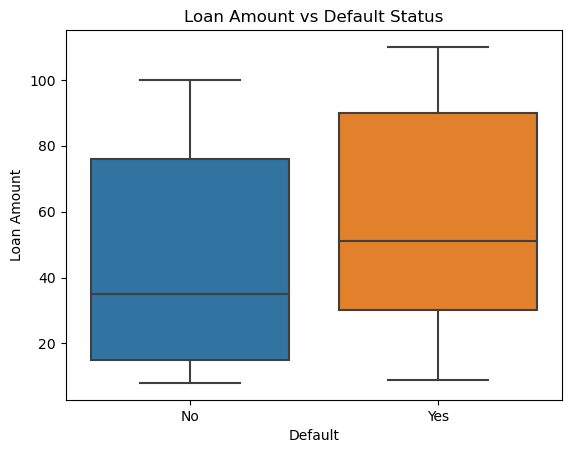

In [7]:
# Plotting the distribution of loan amount based on default status
# Another boxplot to understand how 'Loan Amount' varies with 'Default'
ax = sns.boxplot(data=loan_df, x='Default', y='Loan Amount')
plt.title('Loan Amount vs Default Status')
plt.show()

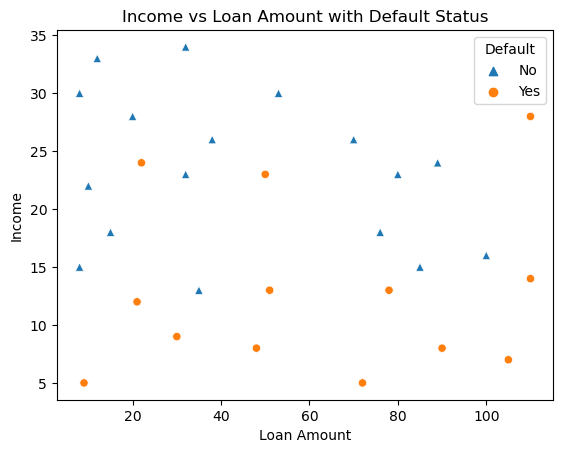

In [8]:
# Plotting the relationship between Loan Amount and Income
# Using a scatter plot to visualize how 'Loan Amount' and 'Income' relate, with 'Default' as hue to show different default statuses
sns.scatterplot(data=loan_df, x='Loan Amount',
                y='Income', 
                hue='Default',
                style='Default',
                markers={'Yes': 'o', 'No': '^'})
plt.title('Income vs Loan Amount with Default Status')
plt.show()

In [9]:
# Preparing the data for modeling the Classfication Trees


# We will focus on transforming and encoding the necessary features to be suitable for a decision tree model


# 'Default' is the target, and 'Income' and 'Loan Amount' are the features
x = loan_df[['Income', 'Loan Amount']]
x.head()

,Income,Loan Amount
0,15,8
1,30,8
2,5,9
3,22,10
4,33,12


In [10]:
# Defining the target variable (y) and feature variables (X)
y = loan_df[['Default']]
y.head()

,Default
0,No
1,No
2,Yes
3,No
4,No


In [11]:
from sklearn.model_selection import train_test_split  # Function for splitting the dataset into training and test sets

# Splitting the dataset into training and test sets
# We use train_test_split to divide our data into training and testing subsets
# X_train, X_test: Feature subsets for training and testing
# y_train, y_test: Target subsets for training and testing
# train_size=0.8: Specifies that 80% of the data will be used for training
# stratify=y: Ensures that the target variable 'Default' has the same distribution in both training and test sets
# random_state=1234: Fixes the random seed for reproducibility of results

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=1234)

In [12]:
# Checking the shapes of the training and test sets
# This will help us ensure that the data has been split correctly and understand the number of samples in each subset
x_train.shape, x_test.shape

((24, 2), (6, 2))

In [13]:
# Train and Evaluate the Classification Tree
# In this section, we will train a decision tree classifier to predict whether a loan will default or not

from sklearn.tree import DecisionTreeClassifier  # Importing the decision tree classifier from scikit-learn
# Initializing the Decision Tree Classifier
# Setting random_state=1234 for reproducibility
classifier = DecisionTreeClassifier(random_state=1234)

In [14]:
# Training the model using the training data
# We use the fit method to train the classifier on x_train and y_train
tree_model = classifier.fit(x_train, y_train)


In [15]:
# Evaluating the model on the test data
# The score method returns the mean accuracy on the given test data and labels
accuracy = tree_model.score(x_test, y_test)
accuracy

# Note: The accuracy obtained is 0.5 (50%). For a model to be efficient, it should achieve an accuracy above 50%.
# Since the accuracy here is 50%, it means the model is performing just as well as random guessing, which is not ideal.
# Consider tuning hyperparameters or using different features to improve model performance.

0.5

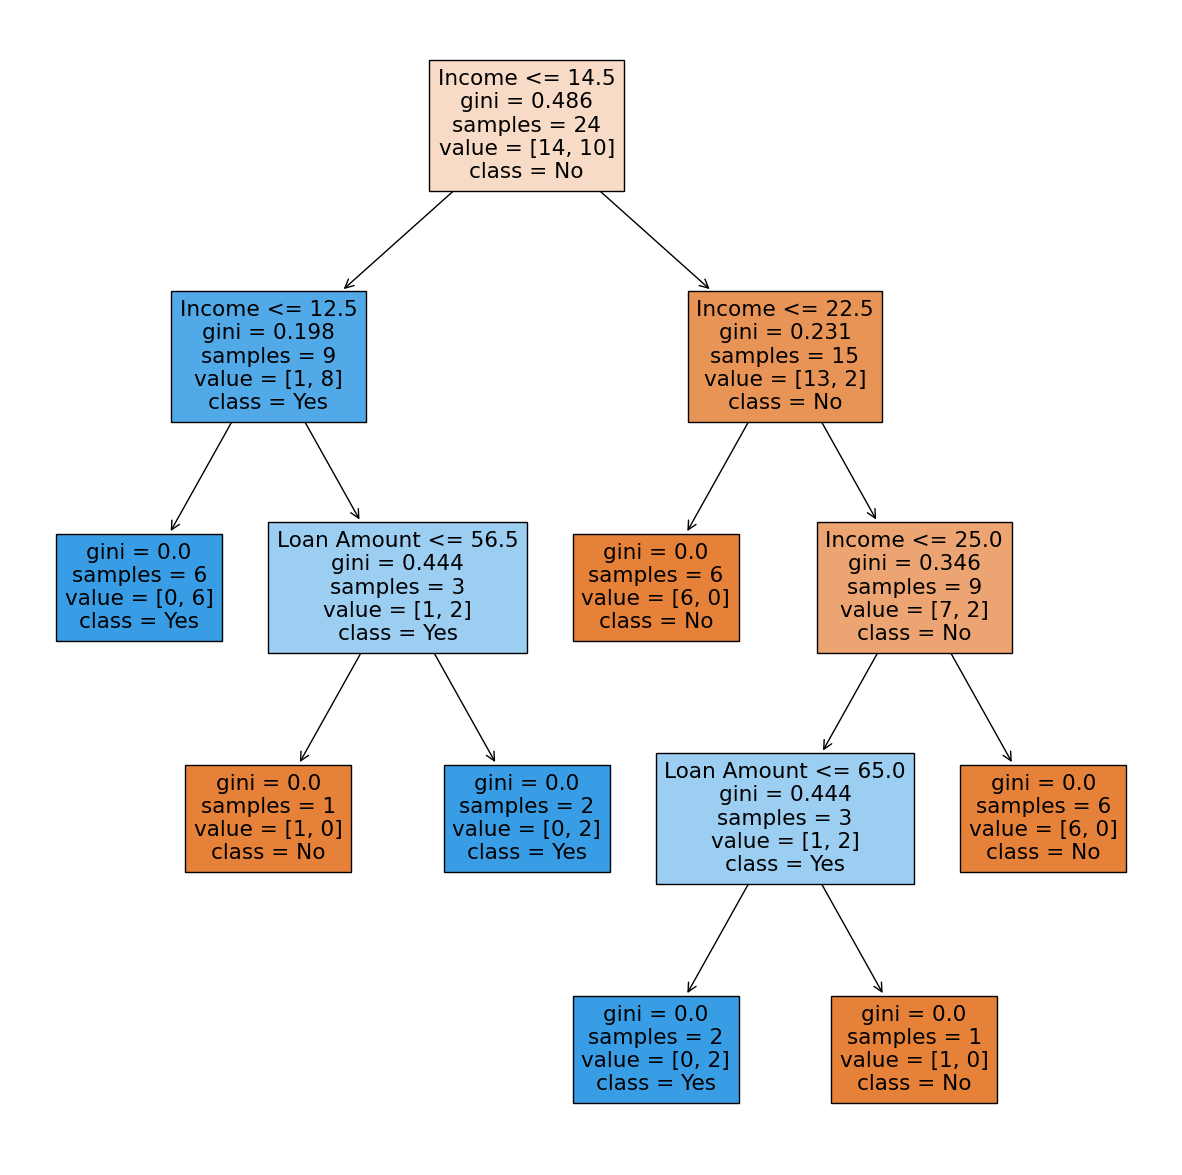

In [16]:
# Visualizing the Classification Tree
# We will use the trained model to plot the decision tree and understand how the model makes decisions
from sklearn import tree  # Importing tree module to visualize decision trees
# Create a plot of the decision tree
plt.figure(figsize=(15, 15))  # Set the figure size for better readability

# Plotting the decision tree
# Using feature names from the dataset and class names to provide context for the splits and outcomes
tree.plot_tree(classifier, feature_names=['Income', 'Loan Amount'], class_names=['No', 'Yes'], filled=True);

# The plot shows how the decision tree splits the data at each level, allowing us to understand the decision-making process.

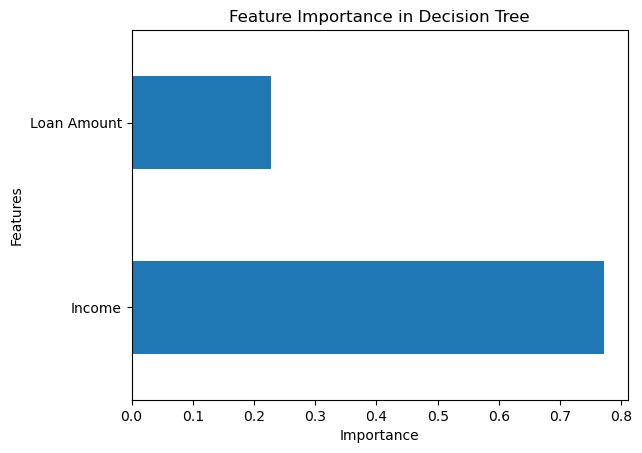

In [18]:
# Feature Importance
# Calculating feature importance to understand which features are most influential in making decisions
importance = classifier.feature_importances_  # Extracting feature importance from the trained model

# Creating a pandas Series to make it easier to interpret
feature_importance = pd.Series(importance, index=['Income', 'Loan Amount'])

# Plotting the feature importance
feature_importance.plot(kind='barh')  # Horizontal bar plot to visualize the importance of each feature
plt.xlabel('Importance')  # Label for the x-axis
plt.ylabel('Features')  # Label for the y-axis
plt.title('Feature Importance in Decision Tree')  # Title for the plot
plt.show()

In [22]:
# In this section, we will demonstrate how to prune a classification tree to improve its performance.

# Evaluate the model on the training data
# The accuracy obtained is 1.0 (100%), which means the model perfectly fits the training data.
# However, this could be a sign of overfitting if the model performs poorly on unseen data.
tree_model.score(x_train, y_train)


1.0

In [23]:
tree_model.score(x_test, y_test)  
# The accuracy obtained is 0.5 (50%), which means the model is not performing better than random guessing on the test data.
#This suggests the model may be overfitting to the training data.

0.5

In [24]:
# Changing Parameters with GridSearchCV
# To find the best combination of hyperparameters for the decision tree, we will use GridSearchCV
# GridSearchCV helps us automatically test multiple hyperparameters to find the optimal values for our model

grid = {'max_depth': [2, 3, 4, 5], 
        'min_samples_split': [2, 3, 4], 
        'min_samples_leaf': [1, 2, 3, 4, 5, 6]}  # Define the parameter grid

# Explanation:
# max_depth: Limits the depth of the tree to control its complexity and prevent overfitting
# min_samples_split: The minimum number of samples required to split an internal node, helps in controlling the growth of the tree
# min_samples_leaf: The minimum number of samples required to be at a leaf node, prevents the model from learning overly specific details (overfitting)

# Using GridSearchCV to find the best parameters
# grid_search = GridSearchCV(estimator=tree_model, param_grid=grid, cv=5)  # Perform cross-validation to find the best parameters
# grid_search.fit(x_train, y_train)  # Fit the model with the best parameters

In [25]:
# Using GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV to tune model hyperparameters

classifier = DecisionTreeClassifier(random_state=1234)  # Initialize the decision tree classifier without setting hyperparameters

gcv = GridSearchCV(estimator=classifier, param_grid=grid, cv=5)  # Create the GridSearchCV object with cross-validation

# Fit the GridSearchCV model on the training data
gcv.fit(x_train, y_train)  # Train the model with the best parameters found by grid search

# Explanation:
# GridSearchCV (gcv): Searches for the best combination of hyperparameters defined in the 'grid' dictionary using cross-validation (cv=5).
# It will try all combinations of 'max_depth', 'min_samples_split', and 'min_samples_leaf' to find the one that yields the best model.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [26]:
# Get the best estimator from GridSearchCV
tree_model = gcv.best_estimator_  # Update tree_model to be the best estimator found by GridSearchCV

# Train the updated tree model
tree_model.fit(x_train, y_train)  # Retrain the model using the best parameters

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

In [27]:
# Evaluate the model with the best parameters on both training and test data
train_accuracy = tree_model.score(x_train, y_train)  # The accuracy on the training data, expected to be 0.876
print(f'Training Accuracy: {train_accuracy:.3f}')

Training Accuracy: 0.875


In [28]:
test_accuracy = tree_model.score(x_test, y_test)  # The accuracy on the test data, expected to be 0.83
print(f'Test Accuracy: {test_accuracy:.3f}')

Test Accuracy: 0.833


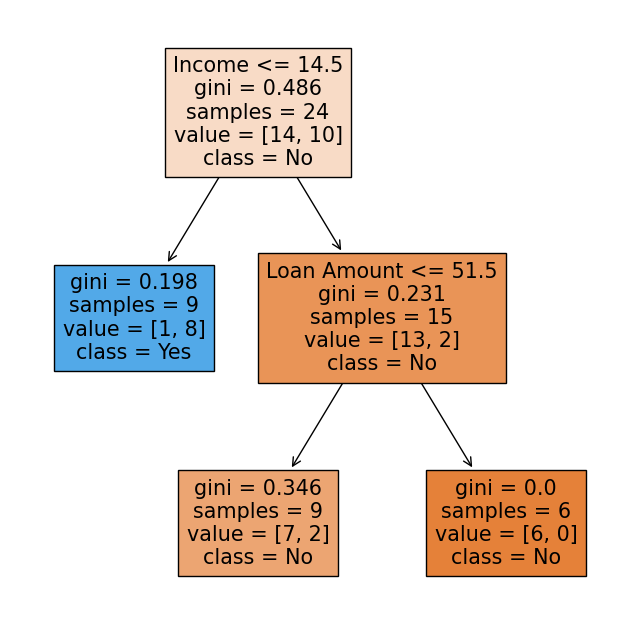

In [30]:
# Visualize the Decision Tree
plt.figure(figsize=(8, 8))  # Set the figure size for better readability
tree.plot_tree(tree_model, feature_names=list(x.columns), 
               class_names=['No', 'Yes'], 
               filled=True)  # Plot the decision tree
plt.show()  # Display the plot

# Explanation of the Decision Tree Plot
# The plot of the decision tree shows several key pieces of information:
# - **Income**: The feature used at each split, representing the condition on which data is divided.
# - **Gini**: The Gini impurity measure at each node, indicating how mixed the classes are. Lower values indicate purer nodes.
# - **Samples**: The number of data points (samples) at each node.
# - **Value**: The number of samples of each class at each node. For example, [15, 10] means there are 15 'No' and 10 'Yes'.
# - **Class**: The predicted class for each node, based on majority voting of the samples at that node.
# The decision tree is filled with colors that represent the majority class at each node, providing a clear visual of how the model makes decisions.

In [5]:
# Regression Tree Example
# In this section, we will create a regression tree to predict continuous values instead of classifications.

#Explore the Data
# We will work with the 'Income' column of our dataset to train the regression model.

import pandas as pd  # Importing pandas for data manipulation

# Load the dataset into a pandas DataFrame
# Assuming the dataset 'income.csv' is available in the working directory
income_df = pd.read_csv('income.csv')
income_df.head()

,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


In [6]:
# Basic information about the dataset
# This will provide an overview of the columns, data types, and non-null values
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [7]:
# Statistical summary of the dataset
# Shows key statistics such as mean, median, and percentiles for numerical columns
income_df.describe()

,Age,Salary
count,30.000000,30.000000
mean,43.366667,64.406667
std,14.375466,26.202684
min,24.000000,16.800000
25%,30.500000,46.350000
50%,45.000000,62.100000
75%,55.000000,76.800000
max,65.000000,118.000000


In [9]:
import matplotlib.pyplot as plt  # Library for plotting
import seaborn as sns  # Library for advanced data visualization

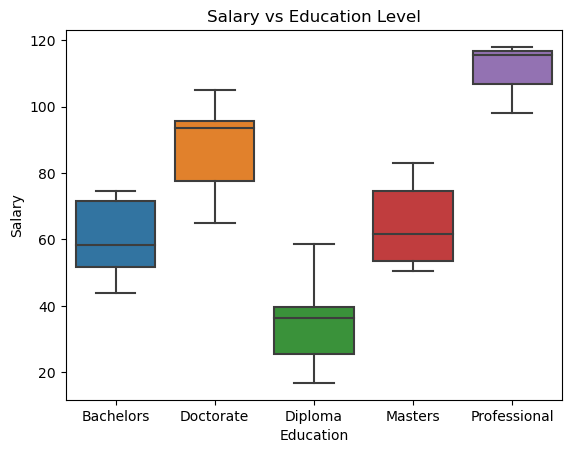

In [10]:
# Plotting the distribution of Salary based on Education level
# Using seaborn to create a boxplot to visualize the relationship between 'Education' and 'Salary'
ax = sns.boxplot(data=income_df, x='Education', y='Salary')
plt.title('Salary vs Education Level')
plt.show()

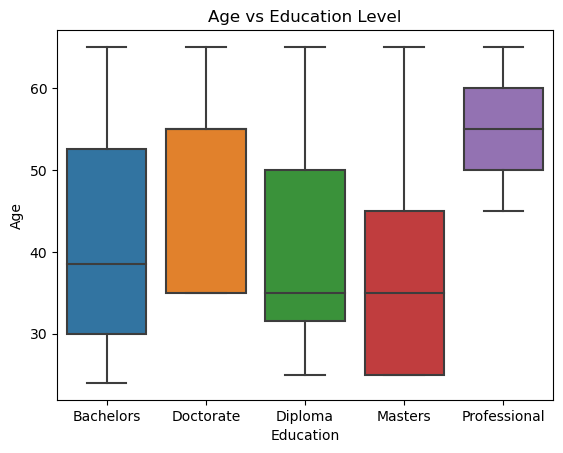

In [11]:
# Plotting the distribution of Age based on Education level
# Another boxplot to understand how 'Age' varies with 'Education'
ax = sns.boxplot(data=income_df, x='Education', y='Age')
plt.title('Age vs Education Level')
plt.show()

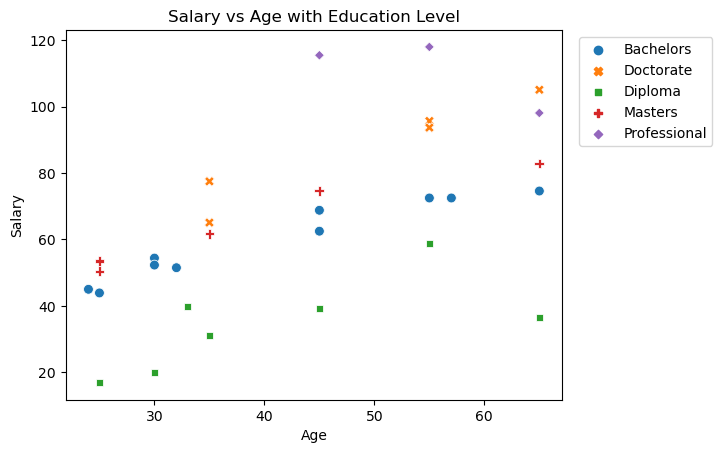

In [12]:
# Plotting the relationship between Age and Salary
# Using a scatter plot to visualize how 'Age' and 'Salary' relate, with 'Education' as hue to show different education levels
sns.scatterplot(data=income_df, x='Age', y='Salary', hue='Education', style='Education', s=50)
plt.title('Salary vs Age with Education Level')
ax = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [36]:
#Prepare the Data
# Extract the features (Age) and the target variable (Salary)
# Here, we are predicting 'Salary' based on the 'Age'

x = income_df[['Age', 'Education']]  # Feature variables  # Feature variable
x.head()

,Age,Education
0,25,Bachelors
1,30,Bachelors
2,45,Bachelors
3,55,Bachelors
4,65,Bachelors


In [37]:
y = income_df['Salary']  # Target variable
y.head()

0    43.9
1    54.4
2    62.5
3    72.5
4    74.6
Name: Salary, dtype: float64

In [52]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# 60% of data for training, 40% for testing, stratified by 'Education'

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,
                                                    stratify=x['Education'],
                                                    random_state=1234)

# Explanation:
# - test_size=0.6: 60% of the data will be used for testing, leaving 40% for training.
# - stratify=income_df['Education']: Ensures that the 'Education' feature has the same distribution in both training and testing sets.
# - random_state=1234: Fixes the random seed for reproducibility of the split.

In [54]:
print(f'Training set shape: x_train: {x_train.shape}')
print(f'Test set shape: x_test: {x_test.shape}')

# Explanation:
# - x_train: (18, 2) represents 18 samples in the training set, each with 2 features ('Age' and 'Education').
# - x_test: (12, 2) represents 12 samples in the testing set, each with 2 features.

Training set shape: x_train: (18, 2)
Test set shape: x_test: (12, 2)


In [55]:
x_train.head()

,Age,Education
0,25,Bachelors
16,45,Masters
17,65,Masters
29,65,Professional
8,25,Diploma


In [63]:
# Display the first few rows of the training set
x_train = pd.get_dummies(x_train, drop_first=False, dtype=int).astype(int) 
# Ensure values are explicitly 0 and 1  # Convert categorical 'Education' feature into dummy/indicator variables
print(x_train)

    Age  Education_Bachelors  Education_Diploma  Education_Doctorate  \
0    25                    1                  0                    0   
16   45                    0                  0                    0   
17   65                    0                  0                    0   
29   65                    0                  0                    0   
8    25                    0                  1                    0   
2    45                    1                  0                    0   
23   32                    1                  0                    0   
13   65                    0                  1                    0   
12   55                    0                  1                    0   
1    30                    1                  0                    0   
6    55                    0                  0                    1   
24   33                    0                  1                    0   
27   57                    1                  0                 

In [64]:
# Display the first few rows of the training set
x_test = pd.get_dummies(x_test, drop_first=False, dtype=int).astype(int) 
# Ensure values are explicitly 0 and 1  # Convert categorical 'Education' feature into dummy/indicator variables
print(x_train)

    Age  Education_Bachelors  Education_Diploma  Education_Doctorate  \
0    25                    1                  0                    0   
16   45                    0                  0                    0   
17   65                    0                  0                    0   
29   65                    0                  0                    0   
8    25                    0                  1                    0   
2    45                    1                  0                    0   
23   32                    1                  0                    0   
13   65                    0                  1                    0   
12   55                    0                  1                    0   
1    30                    1                  0                    0   
6    55                    0                  0                    1   
24   33                    0                  1                    0   
27   57                    1                  0                 

In [65]:
# Train and Evaluate the Regression Tree
# In this section, we train a model (a regression tree) to predict continuous values, specifically 'Salary' based on 'Age'. We also evaluate its performance using metrics like Mean Absolute Error (MAE).
# In this section, we will train a regression tree to predict continuous values and evaluate its performance.

from sklearn.tree import DecisionTreeRegressor  # Importing the decision tree regressor from scikit-learn
# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=1234)


In [66]:
# Train the model
regressor_model = regressor.fit(x_train, y_train)

In [67]:
# Calculate model score on test set
model_score = regressor_model.score(x_test, y_test)
print(f'Model Score (R^2) on Test Set: {model_score:.2f}')

Model Score (R^2) on Test Set: 0.59


In [70]:
#Evaluate the model
# Predicting on the test set
y_test_pred = regressor_model.predict(x_test)
y_test_pred

array([ 39.9,  16.8,  82.9,  58.7,  95.7,  54.4,  58.7,  95.7,  16.8,
       115.5,  72.5,  43.9])

In [71]:
from sklearn.metrics import mean_absolute_error  # Importing metrics for model evaluation
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 13.54


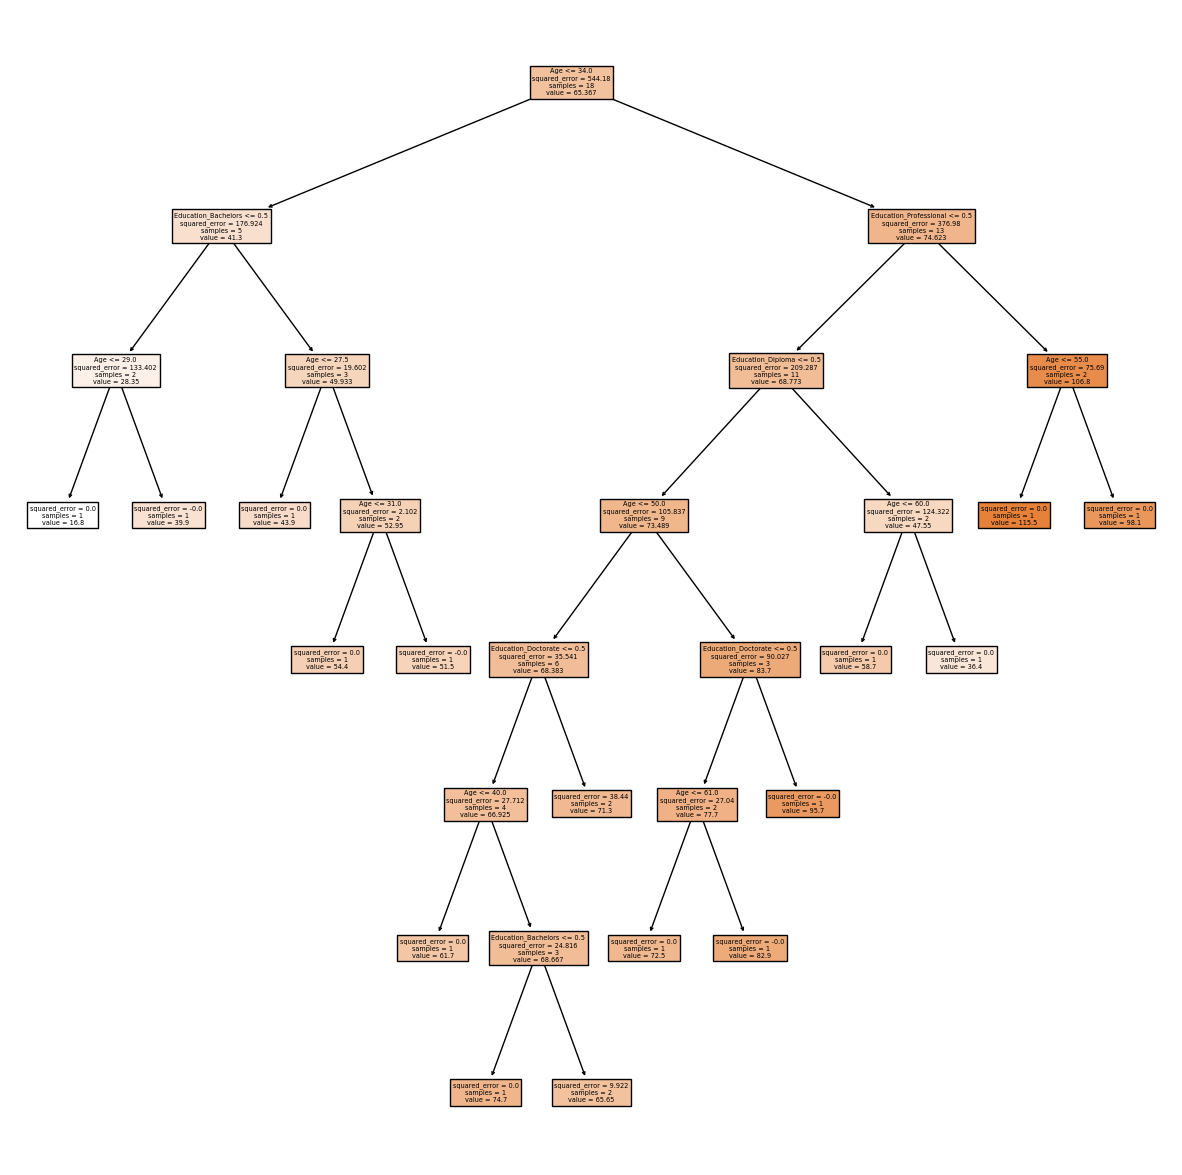

In [73]:
from sklearn import tree
import matplotlib.pyplot as plt

# Create a figure for the plot with a larger size for better visualization
plt.figure(figsize=(15, 15))

# Visualize the decision tree
# - regressor_model: the trained model (DecisionTreeRegressor)
# - feature_names: names of the features (columns of the training set)
# - filled: fill the nodes with colors to help interpret decisions
tree.plot_tree(regressor_model, feature_names=list(x_train.columns), filled=True)
plt.show()

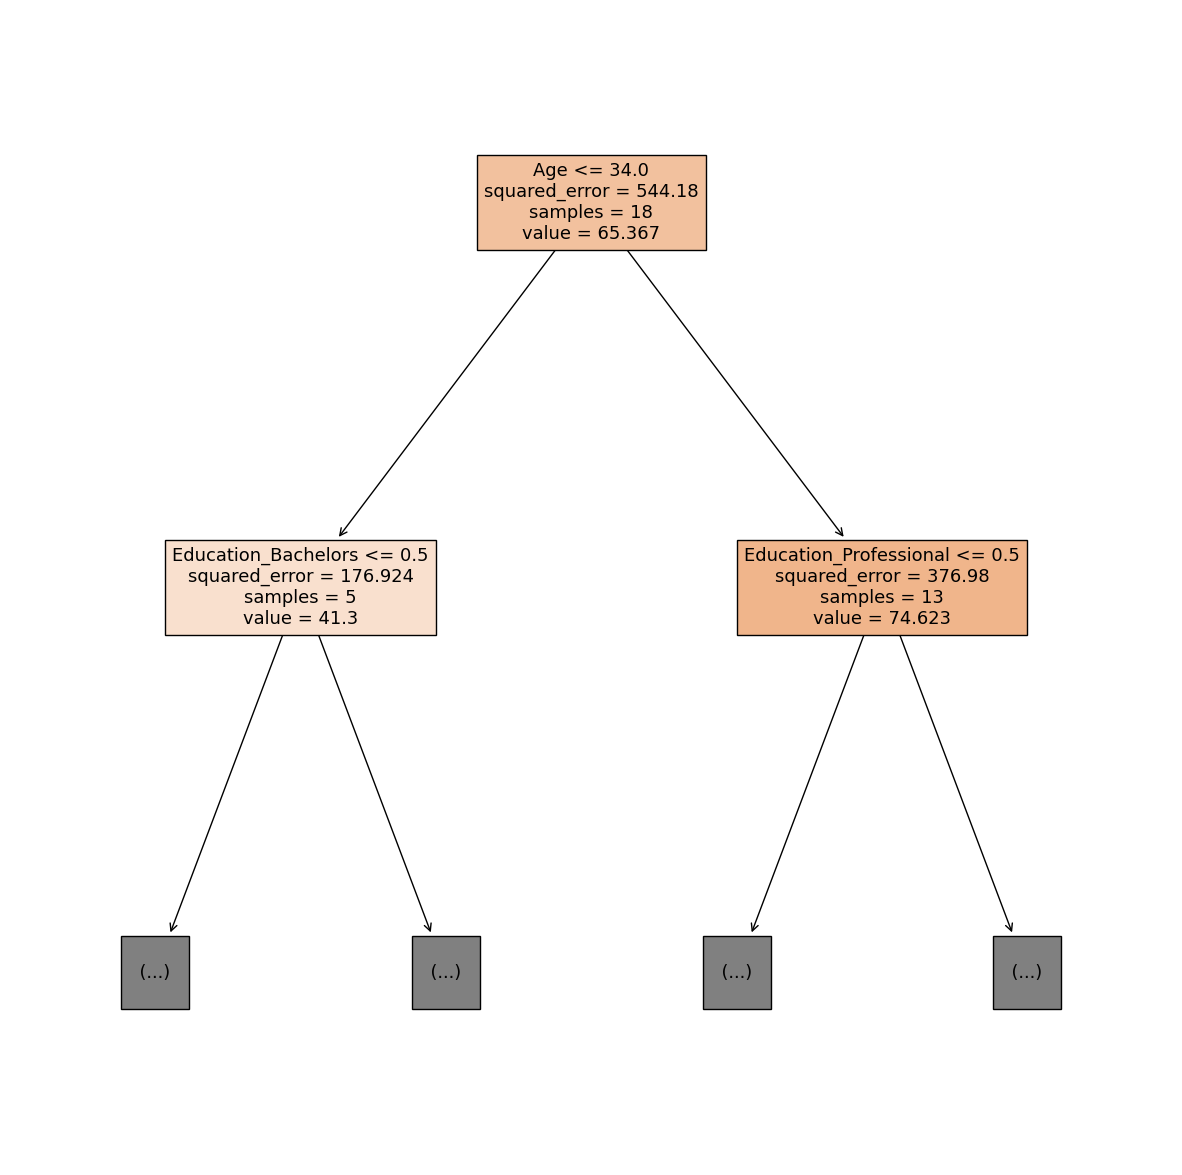

In [75]:
# Create a larger figure to improve readability of the decision tree visualization
plt.figure(figsize=(15, 15))

# Plot the decision tree with the following parameters:
# - regressor_model: trained DecisionTreeRegressor model
# - feature_names: list of feature names from the training set
# - filled: color the nodes to enhance interpretability
# - max_depth: limit the depth of the tree displayed for a clearer view
tree.plot_tree(regressor_model, feature_names=list(x_train.columns), filled=True, max_depth=1)
plt.show()

In [76]:
# Extract feature importance from the trained model
importance = regressor_model.feature_importances_
print('Feature Importances:', importance)

Feature Importances: [0.54597998 0.06326845 0.11352129 0.02490287 0.         0.25232742]


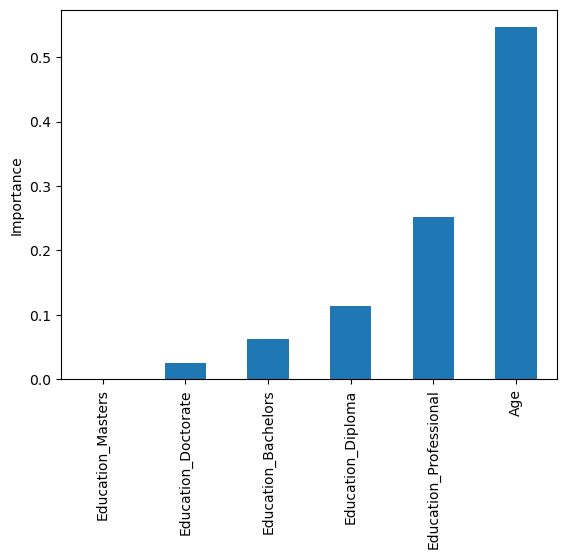

In [78]:
# Extract feature importance from the trained model
importance = regressor_model.feature_importances_
import pandas as pd

# Create a Series with feature importances
feature_importance = pd.Series(importance, index=x_train.columns)

# Sort and plot the feature importances
feature_importance.sort_values().plot(kind='bar')
plt.ylabel('Importance')
plt.show()

In [80]:
# Proceeding with pruning to simplify the decision tree
# Evaluate the model on the training data
# The accuracy obtained is 1.0 (100%), which means the model perfectly fits the training data.
# However, this could be a sign of overfitting if the model performs poorly on unseen data.
regressor_model.score(x_train, y_train)


0.9901253057607573

In [81]:
regressor_model.score(x_test, y_test)  
# The accuracy obtained is 0.5 (50%), which means the model is not performing better than random guessing on the test data.
#This suggests the model may be overfitting to the training data.

0.5853149222529794

In [83]:
# Get the cost complexity pruning path for the decision tree (post-pruning approach)
path = regressor_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = list(path.ccp_alphas)
ccp_alphas

[0.0,
 0.23361111111110705,
 2.1578395061724223,
 3.004444444444693,
 3.0334259259259144,
 8.409999999999753,
 12.000000000000506,
 13.813611111110644,
 14.822500000000016,
 26.06669753086468,
 31.05601851851865,
 61.1659960718292,
 135.95562548562512,
 222.77094017094078]

In [86]:
# Remove the last alpha value as it usually prunes the tree completely
ccp_alphas = ccp_alphas[:-1]
ccp_alphas = list(path.ccp_alphas)
ccp_alphas

[0.0,
 0.23361111111110705,
 2.1578395061724223,
 3.004444444444693,
 3.0334259259259144,
 8.409999999999753,
 12.000000000000506,
 13.813611111110644,
 14.822500000000016,
 26.06669753086468,
 31.05601851851865,
 61.1659960718292,
 135.95562548562512,
 222.77094017094078]

In [87]:
# If the best alpha is the highest, evaluate pruning effectiveness
train_scores, test_scores = [], []
for alpha in ccp_alphas:
    regressor_ = DecisionTreeRegressor(random_state=1234, ccp_alpha=alpha)
    model = regressor_.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

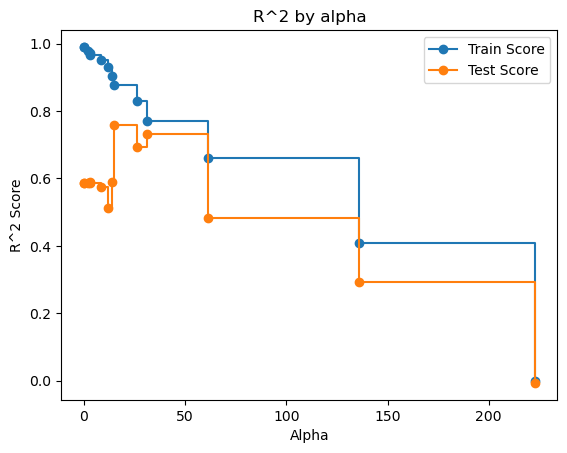

In [88]:
# Plot the R^2 scores by alpha value
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Score', drawstyle='steps-post')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Score', drawstyle='steps-post')
plt.legend()
plt.title('R^2 by alpha')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.show()

# The best alpha is the one with the highest test score

In [89]:
test_scores

[0.5853149222529794,
 0.5857107382012932,
 0.5857107382012932,
 0.5889110156116097,
 0.5861012049128272,
 0.5742699063850475,
 0.5110187660049715,
 0.5901546580161237,
 0.7572572323335666,
 0.6933555316243081,
 0.7328980549684876,
 0.4823659659054369,
 0.2920328593359385,
 -0.00686114065139809]

In [90]:
# The best alpha is the one with the highest test score
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[ix]
print('Best alpha:', best_alpha)

Best alpha: 14.822500000000016


In [91]:
# Use the best alpha to prune the decision tree
regressor = DecisionTreeRegressor(random_state=1234, ccp_alpha=best_alpha)
regressor_model_ = regressor.fit(x_train, y_train)

In [92]:
regressor_model.score(x_train,y_train)

0.9901253057607573

In [93]:
regressor_model.score(x_test,y_test)

0.5853149222529794

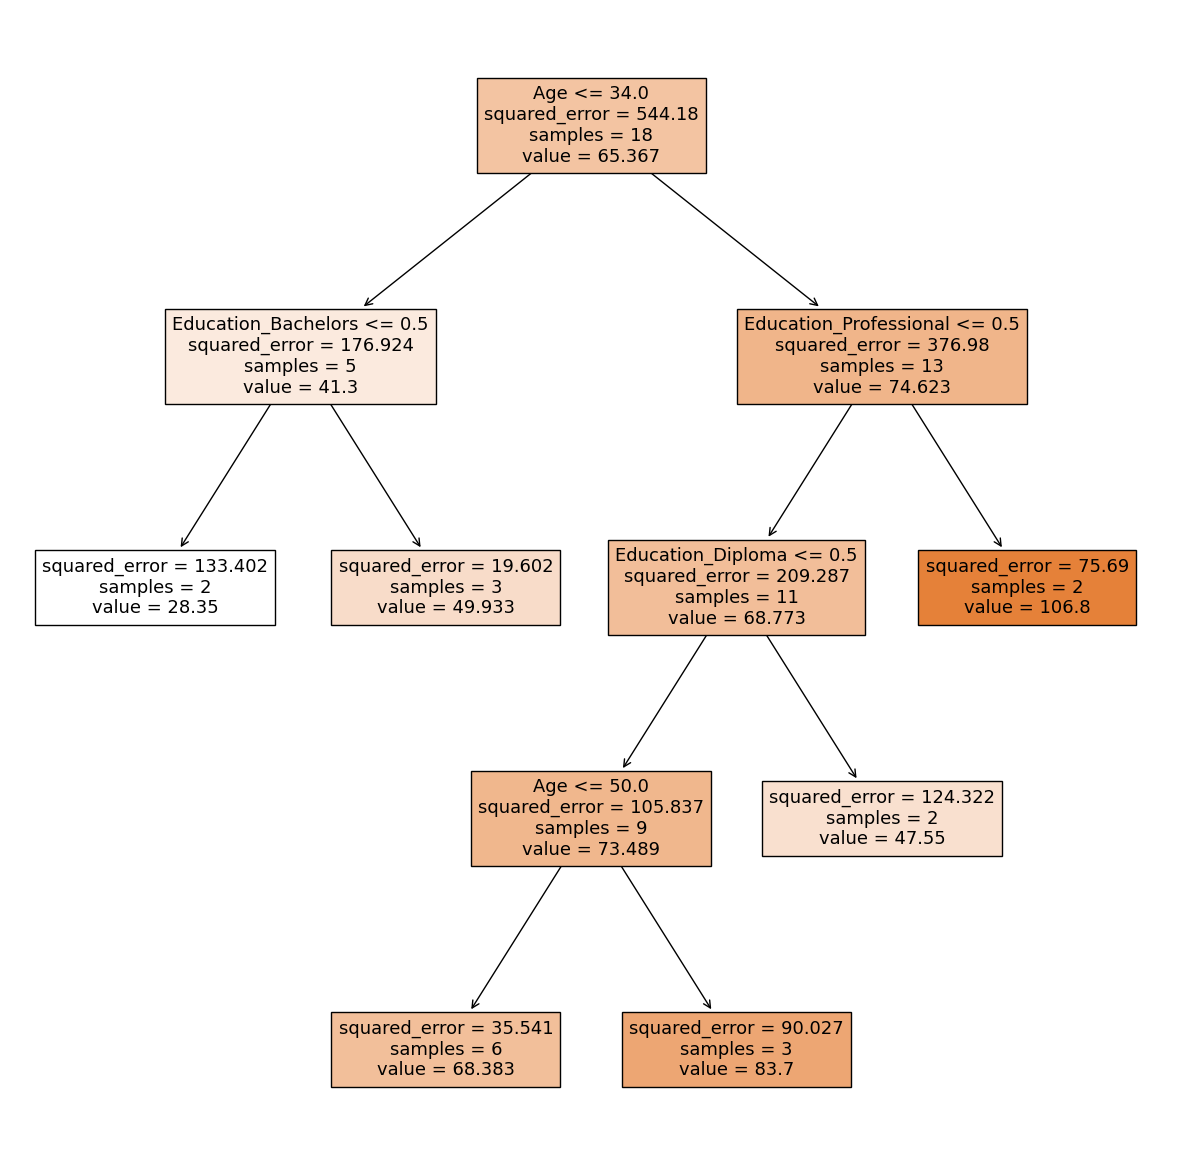

In [94]:
# Plot the pruned decision tree
plt.figure(figsize=(15, 15))
tree.plot_tree(regressor_model_, feature_names=list(x_train.columns), filled=True)
plt.show()